# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

# Import FEYN

In [2]:
import feyn
ql = feyn.QLattice(random_seed=333)

This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


# Importing rpy2 and dependencies

In [3]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

Unable to determine R home: [WinError 2] The system cannot find the file specified


In [4]:
print(rpy2.__version__)

3.5.6


In [5]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x00000280BA935180> [RTYPES.NILSXP]

# Installing R packages

In [6]:
# R package names
packnames = ("zCompositions", "robCompositions")

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [7]:
zCompositions = importr('zCompositions')
robCompositions = importr("robCompositions")

# Import data

In [8]:
path = 'CRC/'
df = pd.read_csv(path + "/all_data.csv")

In [9]:
lbl=LabelEncoder()
df['condition'] = lbl.fit_transform(df['condition'])

In [10]:
groups = df["Country"].to_numpy()
X = df.drop(["condition","Unnamed: 0", "Country"], axis=1)
#X = df.drop(["condition"], axis=1)
y = df["condition"].to_numpy()

In [11]:
X

,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000083,0.000083
1,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,0.000197,...,0.000000,0.000000,0.000000,0.000788,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,0.002777,...,0.000000,0.000000,0.000194,0.000065,0.000000,0.000840,0.0,0.0,0.001808,0.000000
3,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000086,0.019236,0.001111,0.000256,0.000086,0.000086,0.000000,0.000000,0.000513,0.000000,...,0.000000,0.000171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.000000,0.000118,0.000000,0.000000,0.000059,0.000000,0.000118,0.000000,0.000059,0.000000,...,0.002590,0.000000,0.000000,0.001118,0.000000,0.000000,0.0,0.0,0.000000,0.000000
764,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000075,0.000038,0.000113,0.000113,...,0.000151,0.000000,0.000000,0.000151,0.000038,0.000000,0.0,0.0,0.000000,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000348,0.000044,0.001741,0.000000,0.000435,0.0,0.0,0.000000,0.000044
766,0.000000,0.000312,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.0,0.0,0.000000,0.000156


# Pandas dataframe to R table

In [12]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_from_pd_df = robjects.conversion.py2rpy(X)

# Zero replacement

In [13]:
np.random.seed(333)
R_X = zCompositions.cmultRepl(r_from_pd_df, label = 0)

No. adjusted imputations:  425572 


# CLR

In [14]:
np.random.seed(333)
R_clr_X = robCompositions.cenLR(R_X)

In [15]:
type(R_clr_X[0])

rpy2.robjects.vectors.DataFrame

# R table to Pandas dataframe

In [16]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    X = robjects.conversion.rpy2py(R_clr_X[0])

In [17]:
X

,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,-0.639814,-1.123042,-0.638052,-0.627669,-0.766950,-0.451501,0.657708,-0.866839,1.756421,1.756421,...,-0.572469,-0.712546,-0.536782,-0.724254,-0.560843,-0.535670,-0.353747,-0.392983,0.657708,0.657708
1,2.453491,0.256614,-0.833799,-0.823416,-0.962697,-0.647248,-0.873193,0.256614,3.722002,1.354877,...,-0.768216,-0.908293,-0.732529,2.741174,-0.756590,-0.731417,-0.549494,-0.588730,-0.970122,-0.962697
2,2.598610,0.033862,3.671247,-1.061800,0.033862,5.346866,-1.111577,0.033862,5.259407,3.794861,...,-1.006600,-1.146677,1.132273,0.033862,-0.994974,2.598610,-0.787878,-0.827114,3.365865,-1.201081
3,-0.596255,0.544960,-0.594493,-0.584110,-0.723391,-0.407942,1.643102,0.544960,1.237634,-0.723391,...,-0.528910,-0.668988,-0.493223,-0.680695,-0.517284,-0.492111,-0.310188,-0.349424,-0.730816,-0.723391
4,0.157178,5.573185,2.722033,1.255696,0.157178,0.157178,-1.229870,-1.419263,1.948844,-1.319373,...,-1.124892,0.850231,-1.089205,-1.276677,-1.113267,-1.088093,-0.906170,-0.945406,-1.326798,-1.319373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.996471,0.650929,-0.994709,-0.984326,-0.041564,-0.808158,0.650929,-1.223496,-0.041564,-1.123607,...,3.741974,-1.069203,-0.893439,2.902223,-0.917500,-0.892327,-0.710404,-0.749640,-1.131032,-1.123607
764,-0.490840,-0.490840,-1.000097,-0.989714,-1.128995,-0.813546,0.203636,-0.490840,0.608517,0.608517,...,0.896199,-1.074592,-0.898827,0.896199,-0.490840,-0.897715,-0.715792,-0.755028,-1.136420,-1.128995
765,-0.996933,-1.480161,-0.995171,-0.984788,-1.124069,-0.808619,-1.034565,-1.223958,-1.404673,-1.124069,...,-0.929588,1.756708,-0.323276,3.366147,-0.917962,1.979854,-0.710866,-0.750102,-1.131494,-0.323276
766,-0.751492,1.998640,-0.749730,-0.739347,1.593176,-0.563179,-0.789125,-0.978518,-1.159233,-0.878628,...,-0.684147,-0.824225,-0.648460,-0.835932,1.593176,-0.647348,-0.465425,-0.504661,-0.886053,1.305489


In [18]:
X['condition'] = df["condition"].tolist()

## Dataset names

In [19]:
unique_groups = list(np.unique(groups))
unique_groups

['AT-CRC_species',
 'CN-CRC_species',
 'DE-CRC_species',
 'FR-CRC_species',
 'IT-CRC-2_species',
 'IT-CRC_species',
 'JP-CRC_species',
 'US-CRC_species']

# Creating dataframes for results

In [20]:
AUC_scores = pd.DataFrame(index=unique_groups, columns=unique_groups)

In [21]:
ROC_curve = pd.DataFrame(index=unique_groups, columns=["fpr","tpr","auc"])

# LOSO validation with random forests

In [22]:
show_fold_stats = True

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Group : 8 US-CRC_species
ROC AUC score for RandomForest model, LOGO test set: 0.6524
None
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


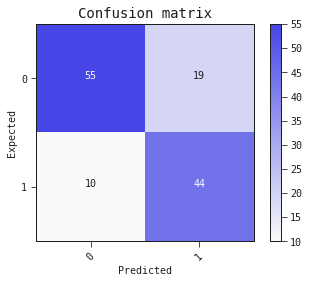

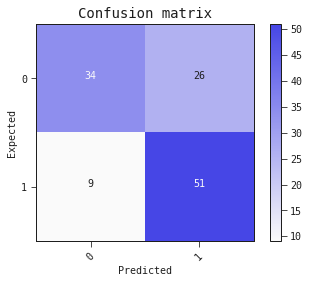

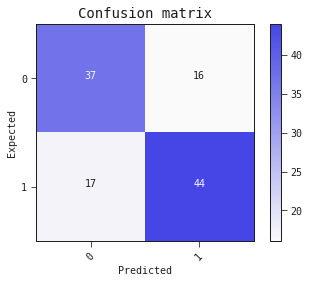

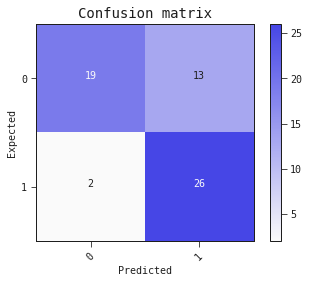

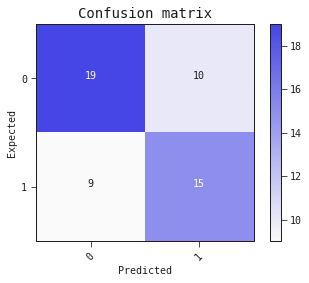

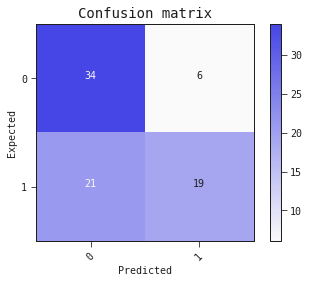

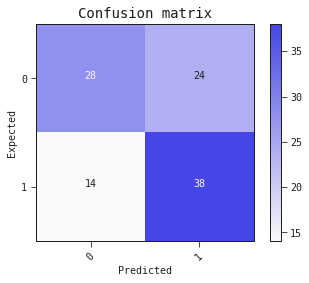

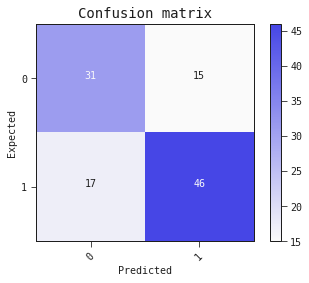

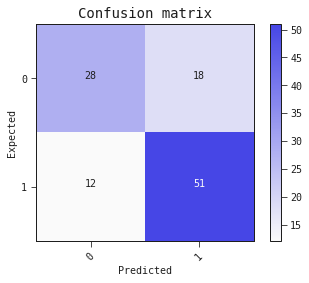

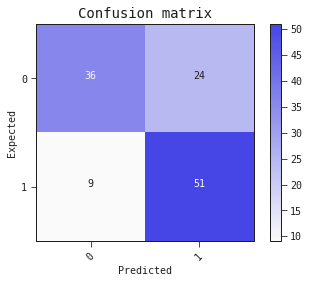

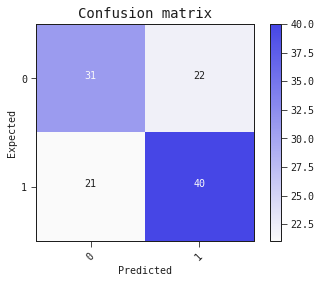

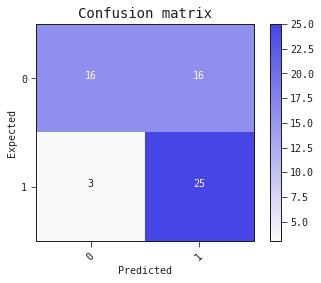

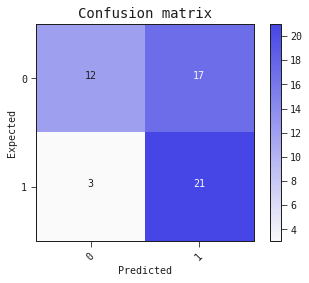

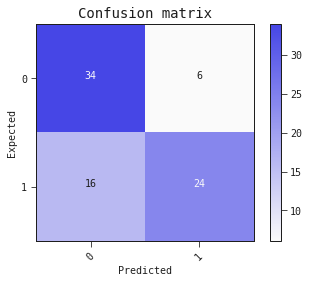

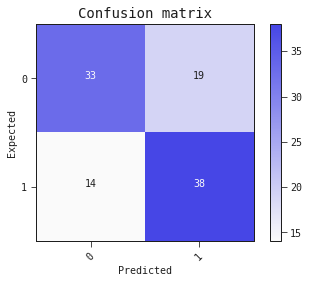

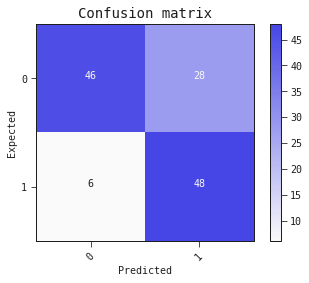

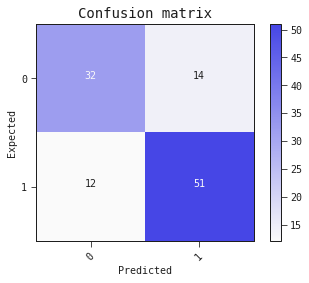

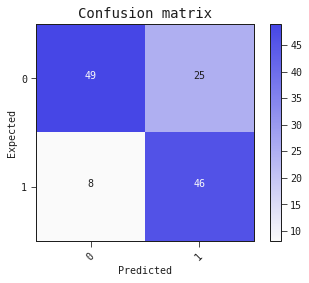

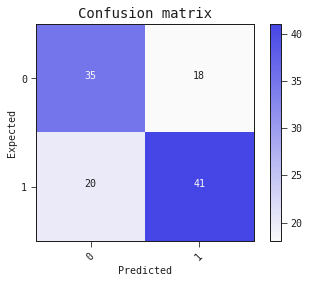

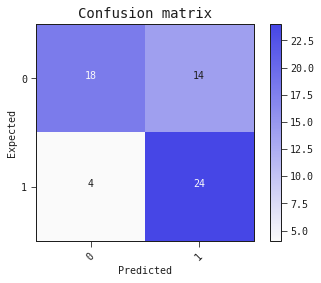

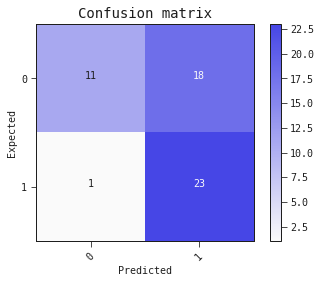

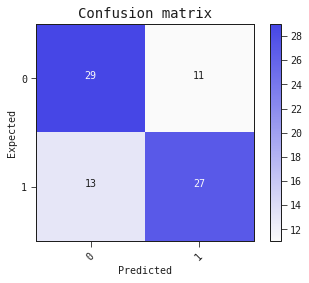

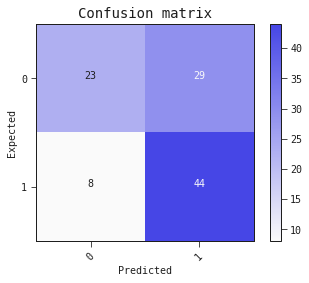

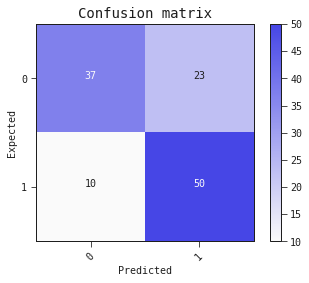

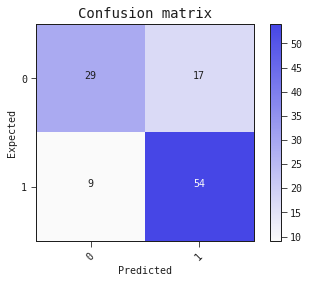

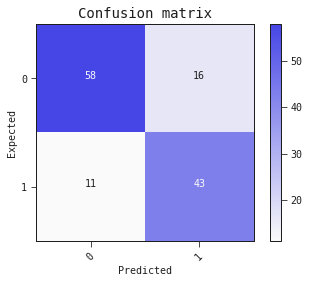

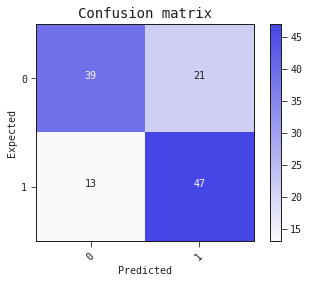

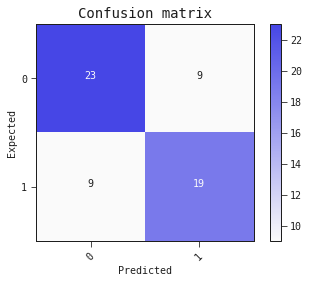

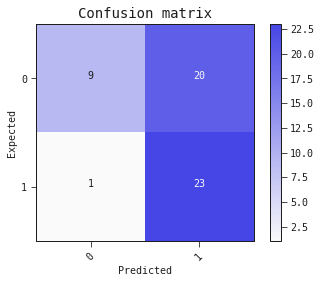

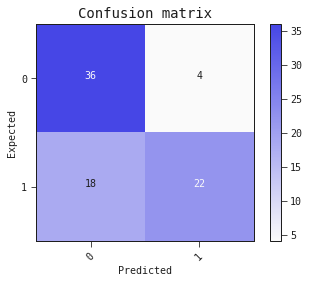

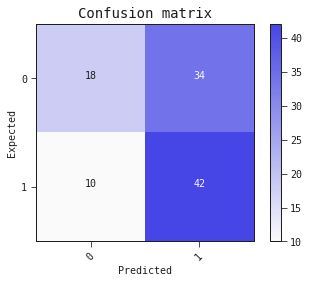

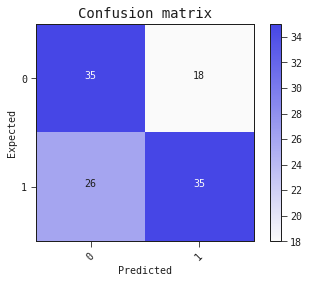

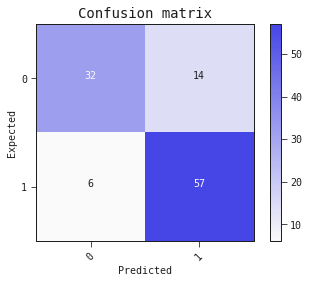

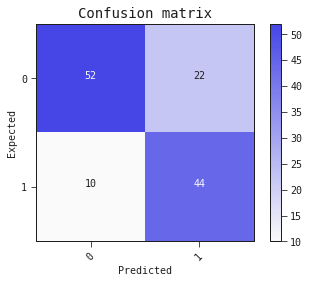

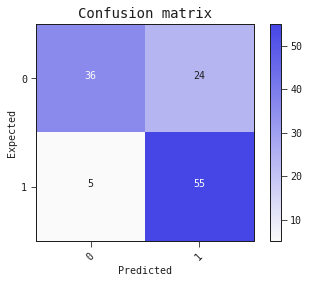

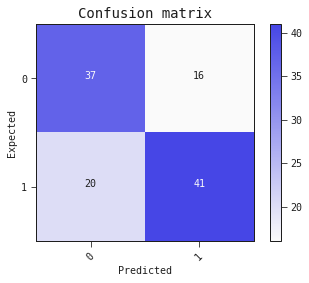

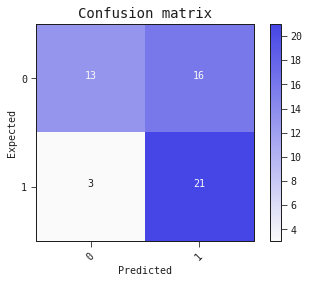

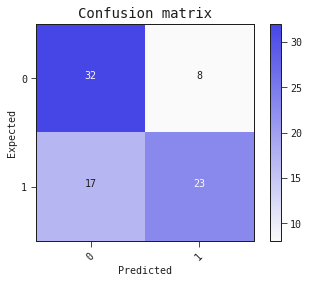

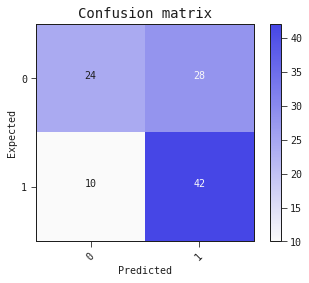

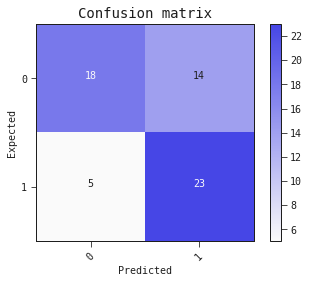

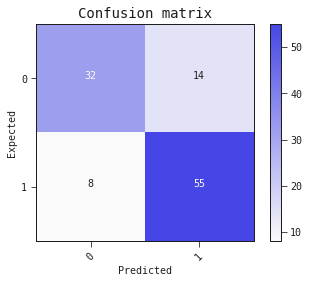

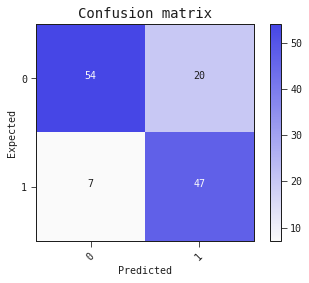

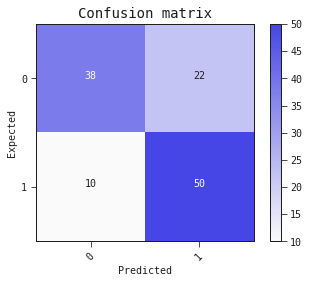

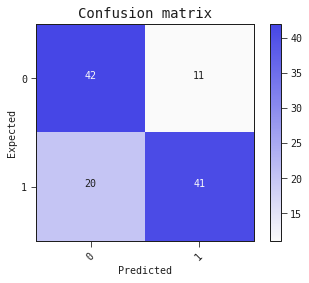

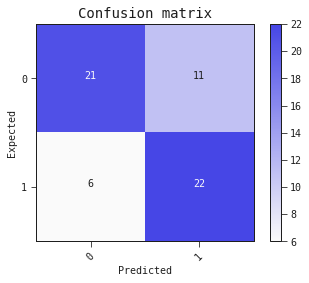

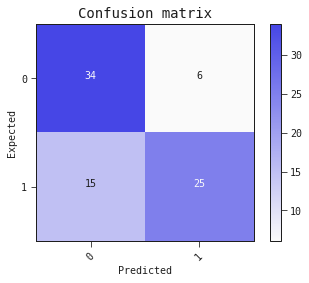

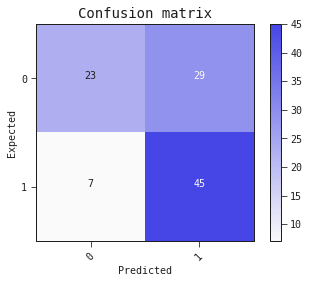

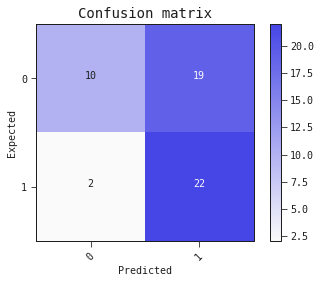

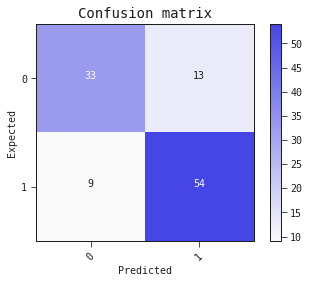

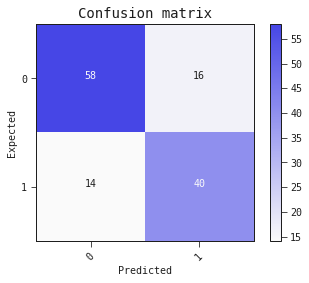

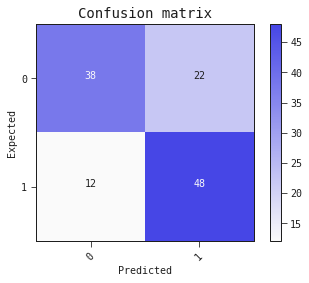

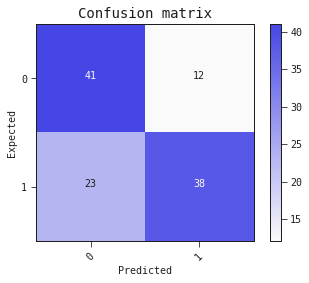

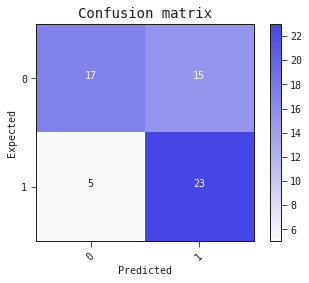

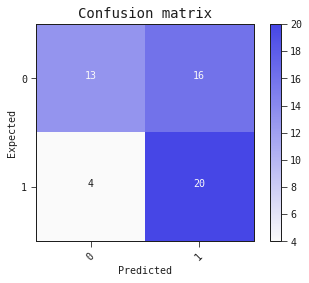

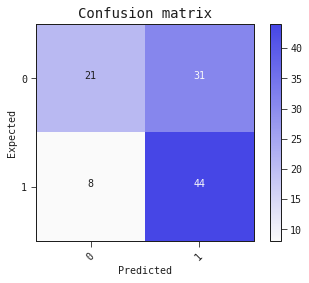

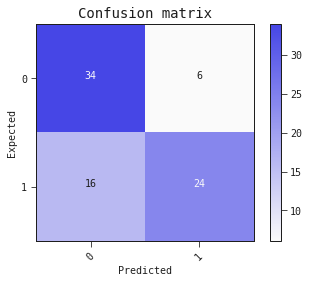

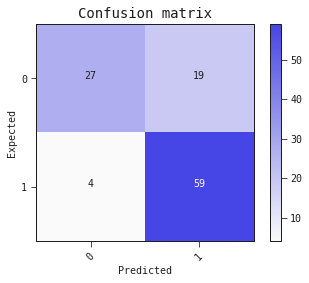

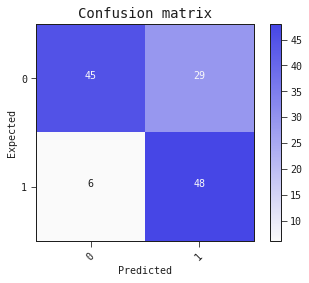

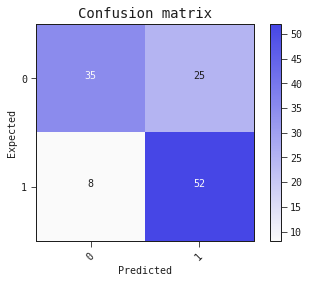

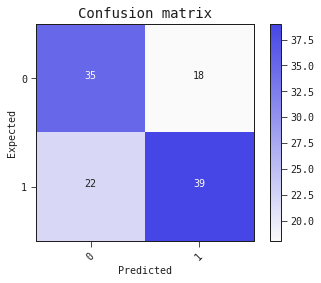

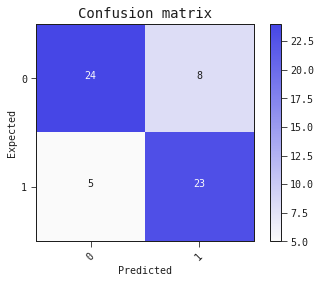

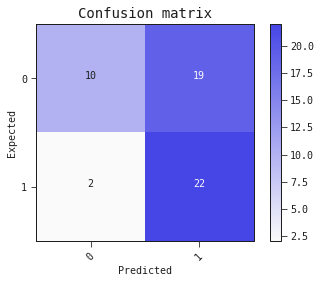

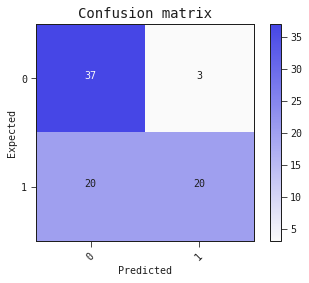

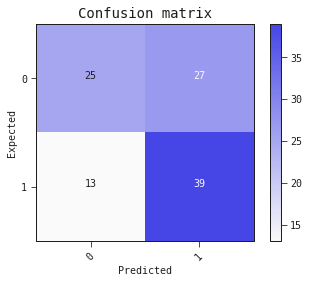

In [23]:
grp = 0
for i in range(len(unique_groups)):
    outer_test_index = list(np.where(df["Country"]==unique_groups[i])[0])
    
    inner_group_list = []
    inner_group_list.append(unique_groups[:i] + unique_groups[i+1:])
    
    outer_train_index = list(np.where(df["Country"]!=unique_groups[i])[0])
    
    #Training dataset
    outer_train_X = X.iloc[outer_train_index]
    outer_train_y = y[outer_train_index]
    
    #Test dataset
    outer_test_X =  X.iloc[outer_test_index]
    outer_test_y =  y[outer_test_index]
    
    for k,name in enumerate(inner_group_list[0]):
        inner_val_index = list(np.where(df["Country"]==name)[0])
        
        inner_train_names = []
        inner_train_names.append(inner_group_list[:k] + inner_group_list[k+1:])
        
        inner_train_index = list(np.where((df["Country"]!=name) & (df["Country"]!=unique_groups[i]))[0])
    
        #Inner training dataset
        inner_train_X = X.iloc[inner_train_index]
        inner_train_y = y[inner_train_index]
        
        #Inner validation dataset
        inner_val_X =  X.iloc[inner_val_index]
        inner_val_y =  y[inner_val_index]
                
        
        # Feyn
        models = ql.auto_run(inner_train_X, output_name = 'condition', kind = 'classification', n_epochs=10)
        best = models[0]
        
        y_pred = best.predict(inner_val_X)

        RF_AUC_test_score = best.roc_auc_score(inner_val_X)

        #Adding auc to dataframe
        AUC_scores.at[unique_groups[i], name] = RF_AUC_test_score

        if show_fold_stats:
            print('-' * 80)
            print('Fold : %s'%(k+1),name)
            print('ROC AUC score for RandomForest model, validation set: %.4f'%RF_AUC_test_score)
            print(best.plot_confusion_matrix(inner_val_X))
            
    
    #Feyn on logo_test data
    models = ql.auto_run(outer_train_X, output_name = 'condition', kind = 'classification', n_epochs=50)
    best = models[0]
    
    y_pred = best.predict(outer_test_X)

    RF_AUC_test_score = best.roc_auc_score(outer_test_X)

    #Adding auc to dataframe
    AUC_scores.at[unique_groups[i], unique_groups[i]] = RF_AUC_test_score
    
    #Getting AUCROC data
    fpr, tpr, _ = roc_curve(outer_test_y,  y_pred)

    #Adding roc curve values to dataframe
    ROC_curve.at[unique_groups[i], "fpr"] = ",".join(str(x) for x in fpr)
    ROC_curve.at[unique_groups[i], "tpr"] = ",".join(str(x) for x in tpr)
    ROC_curve.at[unique_groups[i], "auc"] = RF_AUC_test_score
    

    if show_fold_stats:
        print('-' * 80)
        print('-' * 80)
        print('Group : %s'%(grp+1),unique_groups[i])
        print('ROC AUC score for RandomForest model, LOGO test set: %.4f'%RF_AUC_test_score)
        print(best)
        print(best.plot_confusion_matrix(outer_test_X))
        print('-' * 80)
        print('-' * 80)
        grp += 1
        

# Results and plots

In [24]:
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,0.744651,0.838088,0.801389,0.772966,0.739955,0.715517,0.7775,0.739275
CN-CRC_species,0.731539,0.781532,0.791667,0.716672,0.719866,0.62931,0.8175,0.722633
DE-CRC_species,0.764665,0.808308,0.765278,0.755026,0.732143,0.663793,0.79375,0.70821
FR-CRC_species,0.811249,0.865616,0.784722,0.713579,0.785714,0.617816,0.815625,0.650148
IT-CRC-2_species,0.851967,0.84009,0.764444,0.804207,0.686384,0.681034,0.7775,0.711908
IT-CRC_species,0.877157,0.866116,0.7425,0.807918,0.733259,0.603448,0.785,0.698595
JP-CRC_species,0.816425,0.873123,0.761389,0.805135,0.668527,0.678161,0.775625,0.635355
US-CRC_species,0.857488,0.80956,0.779167,0.718218,0.784598,0.602011,0.805625,0.652367


In [25]:
AUC_scores = AUC_scores.apply(pd.to_numeric, errors='coerce')

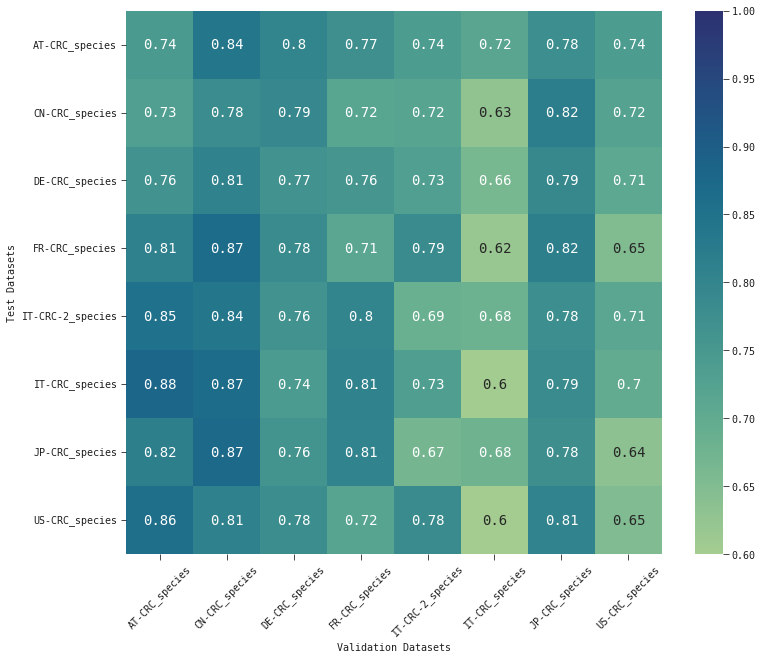

In [26]:
plt.figure(figsize=(12,10))
sns.set_palette("husl", 8)
ax = sns.heatmap(AUC_scores, annot = True, cmap="crest", vmin=0.6, vmax=1.0, annot_kws={"fontsize":14})
ax.set(xlabel="Validation Datasets", ylabel="Test Datasets")
ax.tick_params(axis='x', rotation=45)
plt.savefig("plots/LOSO_CLR_FEYN_1.jpg")
plt.show()

# ROC curves

In [27]:
ROC_curve

,fpr,tpr,auc
AT-CRC_species,"0.0,0.021739130434782608,0.021739130434782608,...","0.0,0.0,0.14285714285714285,0.1428571428571428...",0.744651
CN-CRC_species,"0.0,0.013513513513513514,0.013513513513513514,...","0.0,0.0,0.018518518518518517,0.018518518518518...",0.781532
DE-CRC_species,"0.0,0.0,0.0,0.03333333333333333,0.033333333333...","0.0,0.016666666666666666,0.03333333333333333,0...",0.765278
FR-CRC_species,"0.0,0.0,0.0,0.018867924528301886,0.01886792452...","0.0,0.01639344262295082,0.06557377049180328,0....",0.713579
IT-CRC-2_species,"0.0,0.0,0.0625,0.0625,0.09375,0.09375,0.15625,...","0.0,0.03571428571428571,0.03571428571428571,0....",0.686384
IT-CRC_species,"0.0,0.0,0.1724137931034483,0.1724137931034483,...","0.0,0.041666666666666664,0.041666666666666664,...",0.603448
JP-CRC_species,"0.0,0.0,0.025,0.025,0.05,0.05,0.075,0.075,0.1,...","0.0,0.025,0.025,0.2,0.2,0.25,0.25,0.375,0.375,...",0.775625
US-CRC_species,"0.0,0.0,0.0,0.057692307692307696,0.05769230769...","0.0,0.019230769230769232,0.09615384615384616,0...",0.652367


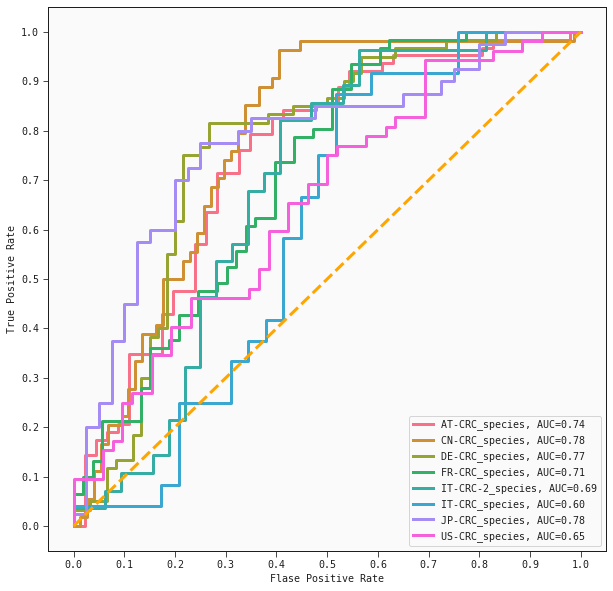

In [28]:
fig = plt.figure(figsize=(10,10))

for i in ROC_curve.index:
    plt.plot([float(s) for s in ROC_curve.loc[i]['fpr'].split(",")], 
             [float(s) for s in ROC_curve.loc[i]['tpr'].split(",")], 
             label="{}, AUC={:.2f}".format(i, ROC_curve.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate")#, fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate")#, fontsize=15)

plt.legend(prop={'size':10}, loc='lower right')

plt.savefig("plots/LOSO_CLR_FEYN_2.jpg")
plt.show()